In [309]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [310]:
data = pd.read_csv('reviews.csv')

# Inisialisasi
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [311]:
print("============================================= INFORMASI DATA =============================================")
data.info()

print("============================================= HEAD DATA =============================================")
data.head()

============================================= INFORMASI DATA =============================================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6327 entries, 0 to 6326
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   s.no                 6327 non-null   int64  
 1   helpfulVoteCount     6327 non-null   int64  
 2   images/0             516 non-null    object 
 3   images/1             212 non-null    object 
 4   images/2             98 non-null     object 
 5   images/3             49 non-null     object 
 6   images/4             26 non-null     object 
 7   images/5             14 non-null     object 
 8   images/6             7 non-null      object 
 9   images/7             5 non-null      object 
 10  productASIN          6327 non-null   object 
 11  productVariant       5836 non-null   object 
 12  rating               6320 non-null   float64
 13  reviewID             6327 non-n

,s.no,helpfulVoteCount,images/0,images/1,images/2,images/3,images/4,images/5,images/6,images/7,...,reviewID,reviewMetadata,reviewPosition,reviewText,reviewTitle,reviewURL,verifiedPurchase,videos/0,cleaned_review_text,sentiment_score
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R2AUQFPJY5ERCZ,"Reviewed in the United States on March 6, 2025",1,‚úçÔ∏è The COOFANDY Men's Polo Shirt is a fant...,Stylish and Lightweight COOFANDY Polo Shirt,https://www.amazon.com/review/R2AUQFPJY5ERCZ,False,NaN,coofandy men polo shirt fantastic blend style ...,0.292024
1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R1YNLJ0QFLB1VT,"Reviewed in the United States on March 7, 2025",1,I love these. They look good. They fit well. T...,New favorite shirts,https://www.amazon.com/review/R1YNLJ0QFLB1VT,False,NaN,love look good fit well comfortable breathable...,0.560000
2,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R11LIYW9RMDK9R,"Reviewed in the United States on February 27, ...",2,My expectations were low -- how good could shi...,Incredibly Good Deal,https://www.amazon.com/review/R11LIYW9RMDK9R,False,NaN,expectation low good could shirt sell one mist...,0.192321
3,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R3K9X391DJNTPZ,"Reviewed in the United States on February 26, ...",3,This 3-pack of multi-color shirts is really a ...,Higher quality & breathable 3-pack shirt set t...,https://www.amazon.com/review/R3K9X391DJNTPZ,False,NaN,pack multicolor shirt really brainer wear type...,0.307949
4,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,RP17IW9ZKENDZ,"Reviewed in the United States on February 20, ...",4,With these three polo shirts I was very satisf...,Pocket Polos Looks Good,https://www.amazon.com/review/RP17IW9ZKENDZ,False,NaN,three polo shirt satisfied quality material go...,0.250000


In [312]:
removeColumns = [
    "images/0","images/1","images/2","images/3","images/4","images/5","images/6","images/7",
    "reviewID","reviewURL","videos/0","productASIN","reviewMetadata"
]

data.to_csv("sesudahHapusColum.csv",index=False)
data.drop(removeColumns, axis=1, inplace=True)

In [313]:
data.head()

,s.no,helpfulVoteCount,productVariant,rating,reviewPosition,reviewText,reviewTitle,verifiedPurchase,cleaned_review_text,sentiment_score
0,0,0,Color: BlackSize: X-Large,5.0,1,‚úçÔ∏è The COOFANDY Men's Polo Shirt is a fant...,Stylish and Lightweight COOFANDY Polo Shirt,False,coofandy men polo shirt fantastic blend style ...,0.292024
1,1,0,Color: Bblack Grey NavySize: 3X-Large,5.0,1,I love these. They look good. They fit well. T...,New favorite shirts,False,love look good fit well comfortable breathable...,0.560000
2,2,0,Color: Grey Navy DuckblueSize: Medium,4.0,2,My expectations were low -- how good could shi...,Incredibly Good Deal,False,expectation low good could shirt sell one mist...,0.192321
3,3,0,Color: Black Duckblue WineredSize: X-Large,5.0,3,This 3-pack of multi-color shirts is really a ...,Higher quality & breathable 3-pack shirt set t...,False,pack multicolor shirt really brainer wear type...,0.307949
4,4,0,Color: Bblack Grey NavySize: X-Large,5.0,4,With these three polo shirts I was very satisf...,Pocket Polos Looks Good,False,three polo shirt satisfied quality material go...,0.250000


In [314]:
colum_clean = [
    "productVariant", "reviewTitle", "reviewText","cleaned_review_text"
]
def preprocess_text(text):
    # Lowercase
    text = text.lower()

    # Hapus angka
    text = re.sub(r'\d+', '', text)

    # Hapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenisasi dan hapus stopwords
    tokens = text.split()
    filtered_tokens = [t for t in tokens if t not in stop_words]

    # Stemming
    stemmed = [stemmer.stem(t) for t in filtered_tokens]

    return ' '.join(stemmed)


X_raw = data["cleaned_review_text"].astype(str)
y_score = data["sentiment_score"]

In [315]:
for i in colum_clean:
  data[i] = data[i].astype(str)
  data[i] = data[i].apply(preprocess_text)


# Konversi skor ke label kategori
y = pd.cut(y_score, bins=[-1, 0.3, 0.6, 1.0], labels=["Negatif", "Netral", "Positif"])
valid_idx = y.notna()
X_raw = X_raw[valid_idx]
y = y[valid_idx]

In [316]:
# TF-IDF
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(X_raw[valid_idx]) # Apply filtering to X_raw

# Encode label
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("X shape:", X_tfidf.shape)
print("Label distribution:", pd.Series(y).value_counts())

X shape: (6326, 5000)
Label distribution: sentiment_score
Negatif    3169
Netral     2611
Positif     546
Name: count, dtype: int64


In [317]:
# Inisialisasi model
model_svm = LinearSVC()
model_logreg = LogisticRegression(max_iter=1000)
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training
model_svm.fit(X_train, y_train)
model_logreg.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [318]:

# Prediksi
y_pred_svm = model_svm.predict(X_test)
y_pred_logreg = model_logreg.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

# Evaluasi
print("==========================================================================================")
print("SVM:\n", classification_report(y_test, y_pred_svm, target_names=le.classes_))
print("==========================================================================================")
print("Logistic Regression:\n", classification_report(y_test, y_pred_logreg, target_names=le.classes_))
print("==========================================================================================")
print("Random Forest:\n", classification_report(y_test, y_pred_rf, target_names=le.classes_))

SVM:
               precision    recall  f1-score   support

     Negatif       0.84      0.91      0.87       634
      Netral       0.78      0.73      0.75       523
     Positif       0.60      0.49      0.54       109

    accuracy                           0.80      1266
   macro avg       0.74      0.71      0.72      1266
weighted avg       0.79      0.80      0.79      1266

Logistic Regression:
               precision    recall  f1-score   support

     Negatif       0.85      0.91      0.88       634
      Netral       0.75      0.79      0.77       523
     Positif       0.72      0.26      0.38       109

    accuracy                           0.80      1266
   macro avg       0.77      0.65      0.68      1266
weighted avg       0.80      0.80      0.79      1266

Random Forest:
               precision    recall  f1-score   support

     Negatif       0.78      0.87      0.82       634
      Netral       0.71      0.68      0.70       523
     Positif       0.67      0.

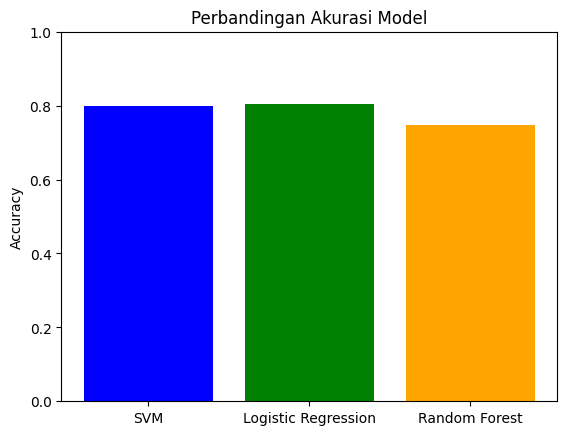

In [319]:
import matplotlib.pyplot as plt

models = ['SVM', 'Logistic Regression', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_logreg),
    accuracy_score(y_test, y_pred_rf)
]

plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylabel("Accuracy")
plt.title("Perbandingan Akurasi Model")
plt.ylim(0, 1)
plt.show()
